### Importing libraries

In [9]:
import matplotlib.pyplot as plt
from imutils import face_utils
import numpy as np
import dlib
import cv2

font = cv2.FONT_HERSHEY_SIMPLEX

### Declare Cascade classifiers

In [16]:
cascPath =  "F:/Data/Anaconda/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"
eyePath =   "F:/Data/Anaconda/Lib/site-packages/cv2/data/haarcascade_eye.xml"
smilePath = "F:/Data/Anaconda/Lib/site-packages/cv2/data/haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

### Detect face on an image

#### Load the image

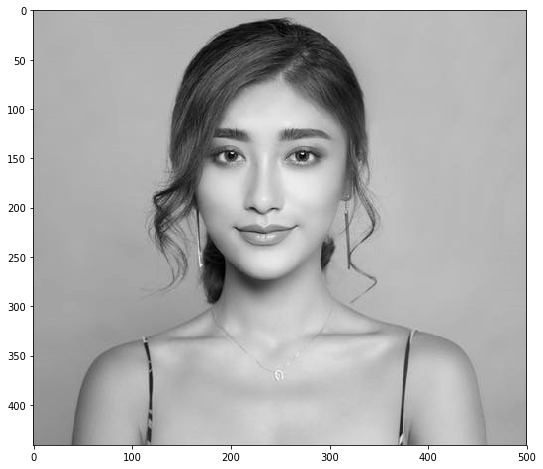

In [20]:
gray = cv2.imread('data/face_3.jpg', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

#### Detect faces

In [21]:
faces = faceCascade.detectMultiScale(
    gray, 
    scaleFactor = 1.1, 
    minNeighbors = 5, 
    flags = cv2.CASCADE_SCALE_IMAGE
)

# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 3)

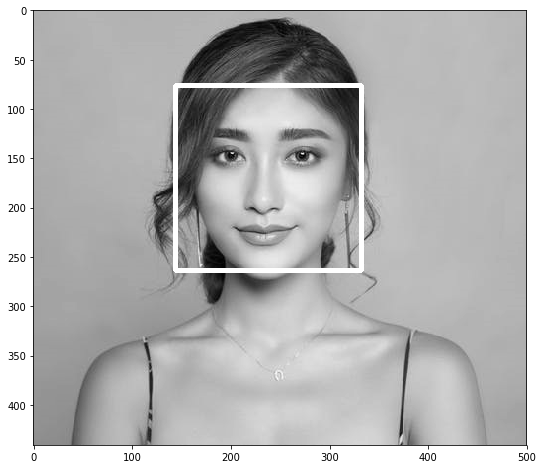

In [22]:
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

### Real Time Face Detection

In [17]:
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Using the faceCascade variable define above, which contains a pre-trained algorithm, 
    # and apply it to the gray scale image.
    faces = faceCascade.detectMultiScale(
        gray, 
        scaleFactor = 1.1, 
        minNeighbors = 5, 
        minSize = (30, 30), 
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    # For each face detected, draw a rectangle around the face
    for (x, y, w, h) in faces:        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame, 'Face', (x, y), font, 2, (255, 0, 0), 5)
            
    # For each mouth detected, draw a rectangle around it
    smile = smileCascade.detectMultiScale(
        roi_gray, 
        scaleFactor = 1.16, 
        minNeighbors = 35, 
        minSize = (25, 25), 
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
        
    # For each eye detected, draw a rectangle around it
    eyes = eyeCascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)
    
    # Count the total number of faces, and display the overall image 
    cv2.putText(frame,'Number of Faces: ' + str(len(faces)), (40, 40), font, 1, (255,0,0), 2)      
    
    # Display the resulting frame
    cv2.imshow('Video', frame)
    
    # Implementing an exit option when we want to stop the camera by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Release the capture upon completion
video_capture.release()
cv2.destroyAllWindows()